# My Try

**Since we are constrained on the data aquistion part, so the approach starts acknowledging the variables provided and then the following as follows**

## 1. Problem Statement
Forecasting the hourly bike rental demand.

In [108]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
from scipy.stats import ttest_ind
from datetime import datetime
from datetime import date
%matplotlib inline

In [109]:
#loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# dropping id column as its usage is against the rule 4

In [110]:
# dropping id column as its usage is against the rules
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [111]:
# Identification of datatypes
train.columns

Index(['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

*Target variable :* **target**

*Predictor variable :* **all other except count**

## 2. Hypothesis Generation

1. **perc_premium_paid_by_cash_credit** : user paying via credit is more likely to pay premium, 
>must be aware of benfits and penalities associated with loan_payment.

2. **age_in_days** : a new policy holder is less likely to pay premium.
> factors: may find it expensive initially adjusting with his/her daily expense, forgetting to pay on time.

3. **Income** : a person with higher income is more stable and hence will be paying premium on time.

4. **Count_more_than_12_months_late** : a person with late by 12 or more months will be less likely to pay the premium

5. **application_underwriting_score** : a person with higher underwriting score can be considere a regular payee.

6. **no_of_premiums_paid** : a regular paying customer will be more likely to pay the premium.

6. **residence_area_type** : a urban resident is more likely to pay the premium
> as he/she will be aware of the advantages and disadvantages associated with the same

## 3. Data Exploration

### A. Variable Identification

In [112]:
# datatype identification
train.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

with the above data retrieved and provided information on variables we infer the following classification of variables:

categorical | | continuous
:--- | :---: | :---
sourcing_channel | | perc_premium_paid_by_cash_credit
residence_area_type | | age_in_days
target | | Income
 | | Count_3-6_months_late
 | | Count_6-12_months_late
 | | Count_more_than_12_months_late
 | | application_underwriting_score

### B. Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14E72830>,
      dtype=object)

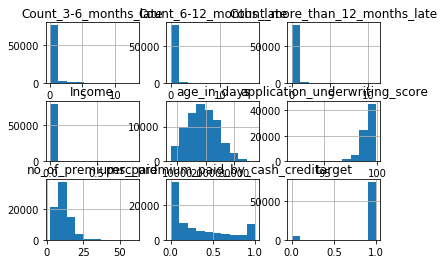

In [113]:
train.hist()

In [114]:
train.median() - train.mean()

perc_premium_paid_by_cash_credit       -0.147288
age_in_days                          -221.696906
Income                             -42287.171177
Count_3-6_months_late                  -0.248671
Count_6-12_months_late                 -0.078188
Count_more_than_12_months_late         -0.060008
application_underwriting_score          0.142709
no_of_premiums_paid                    -0.863887
target                                  0.062590
dtype: float64

The differences magnitute can be utilise for degree of right skewdness,
our variables of interest thus are **age_in_days**, **registered** and **casual**, which shows unusually high values.

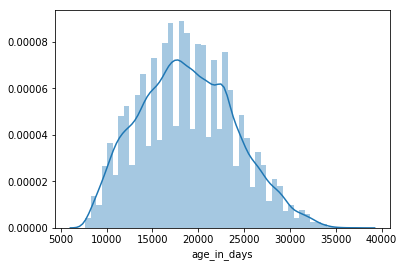

In [115]:
sn.distplot(train['age_in_days'])

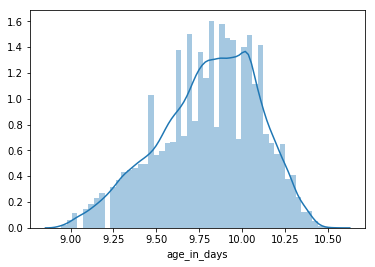

In [116]:
sn.distplot(np.log(train["age_in_days"]))

In [117]:
skewed_age = np.log(train["age_in_days"])
np.median(skewed_age) - np.mean(skewed_age)

0.02858573858345359

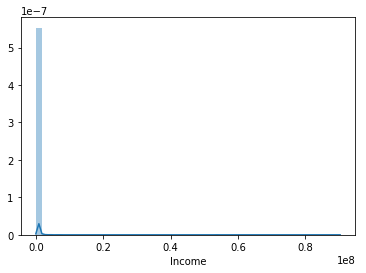

In [118]:
sn.distplot(train["Income"])

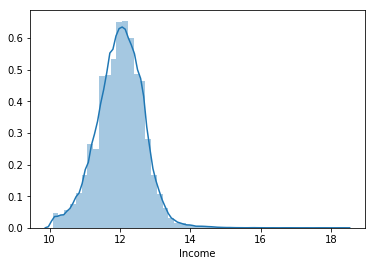

In [119]:
sn.distplot(np.log(train["Income"]))

In [120]:
skewed_income = np.log(train["Income"])
np.median(skewed_income) - np.mean(skewed_income)

0.01933233131976131

In [121]:
# variable transformation for income
train["Income"] = np.log(train["Income"])

## TODO POSSIBLE OPTIMISATION HERE

#### Search of Missing Values

In [122]:
train.shape

(79853, 11)

In [123]:
train.describe()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,0.314288,18846.696906,12.003779,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,0.334915,5208.719136,0.660531,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,0.000000,7670.000000,10.087058,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,0.034000,14974.000000,11.589979,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,0.167000,18625.000000,12.023111,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,0.538000,22636.000000,12.437541,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,1.000000,37602.000000,18.318234,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [124]:
train.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

alot of missing values in are there within the column **application_underwriting_score**

since the three columns **Count_3-6_months_late** , **Count_6-12_months_late** and **Count_more_than_12_months_late** are disjoint we will impute by default to 0

#### Anamolies(Outliers) detection
##### for continuous vars

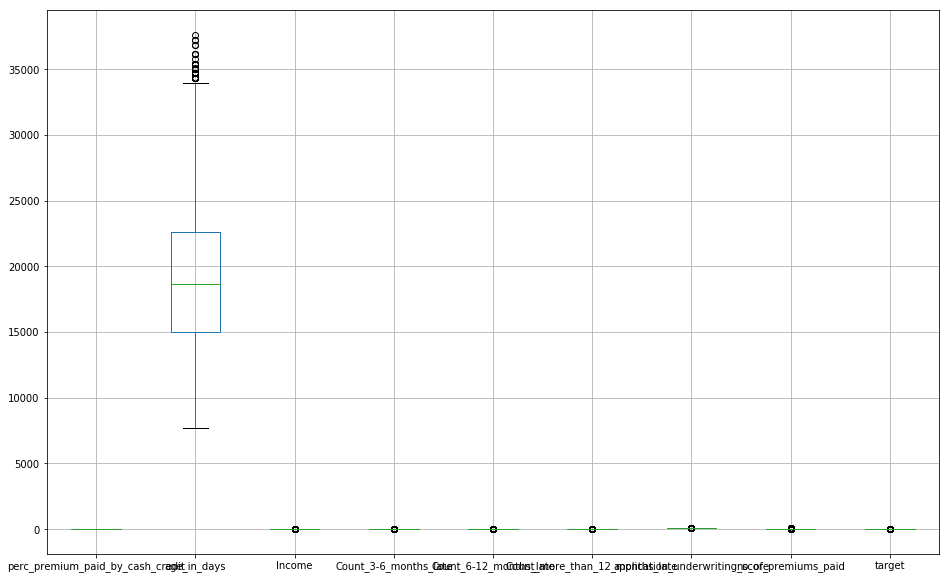

In [125]:
plt.figure(figsize=(16, 10))
train.boxplot()

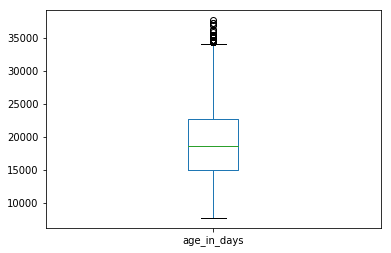

In [126]:
# detected in variable age_in_days
train['age_in_days'].plot.box()

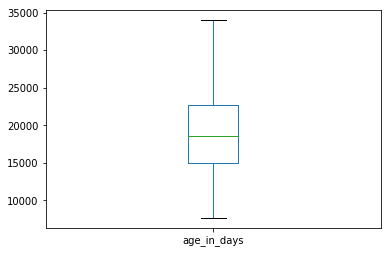

In [127]:
# Deleting outliers
# Q3 + 1.5 *IQR
IQR = train['age_in_days'].quantile(0.75) - train['age_in_days'].quantile(0.25)
train = train[ train['age_in_days'] <= (train['age_in_days'].quantile(0.75) + 1.5*IQR ) ]
train['age_in_days'].plot.box()

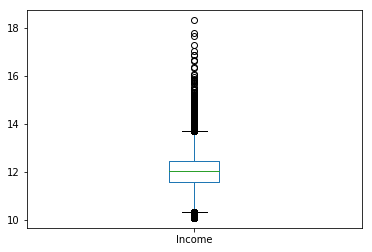

In [128]:
# detected in variable age_in_days
train['Income'].plot.box()

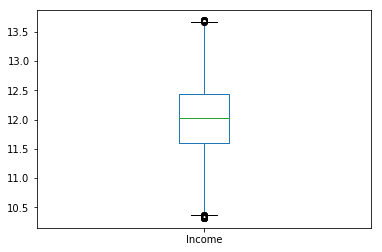

In [129]:
# Deleting outliers
#
q1 = train['Income'].quantile(0.25)
q3 = train['Income'].quantile(0.75)
IQR = q3 - q1
train = train[ train['Income'] >= (q1 - 1.5*IQR)]
train = train[ train['Income'] <= (q3 + 1.5*IQR)]
train['Income'].plot.box()


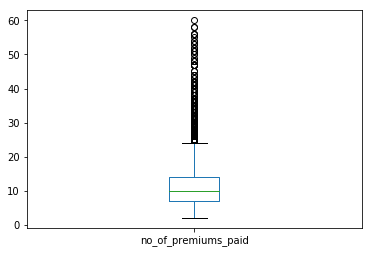

In [130]:
train['no_of_premiums_paid'].plot.box()

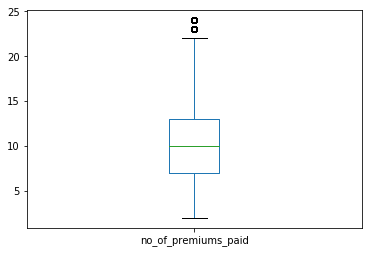

In [131]:
# Deleting outliers
#
q1 = train['no_of_premiums_paid'].quantile(0.25)
q3 = train['no_of_premiums_paid'].quantile(0.75)
IQR = q3 - q1
train = train[ train['no_of_premiums_paid'] >= (q1 - 1.5*IQR)]
train = train[ train['no_of_premiums_paid'] <= (q3 + 1.5*IQR)]
train['no_of_premiums_paid'].plot.box()

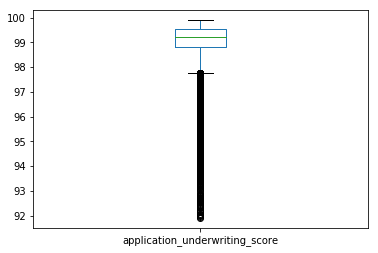

In [132]:
train['application_underwriting_score'].plot.box()

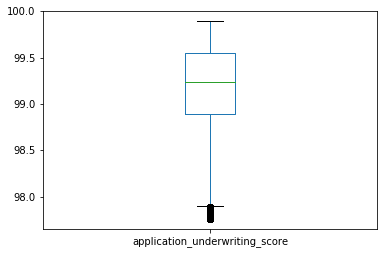

In [133]:
# Deleting outliers
#
q1 = train['application_underwriting_score'].quantile(0.25)
q3 = train['application_underwriting_score'].quantile(0.75)
IQR = q3 - q1
train = train[ train['application_underwriting_score'] >= (q1 - 1.5*IQR)]
train = train[ train['application_underwriting_score'] <= (q3 + 1.5*IQR)]
train['application_underwriting_score'].plot.box()

#### Univariate Analysis of categorical vars

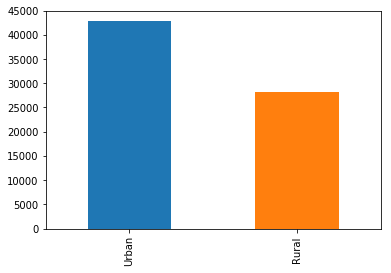

In [134]:
train['residence_area_type'].value_counts().plot.bar()

In [135]:
train['sourcing_channel'].value_counts()

A    37482
B    14984
C    10948
D     6933
E      550
Name: sourcing_channel, dtype: int64

### C. Bivariate Analysis

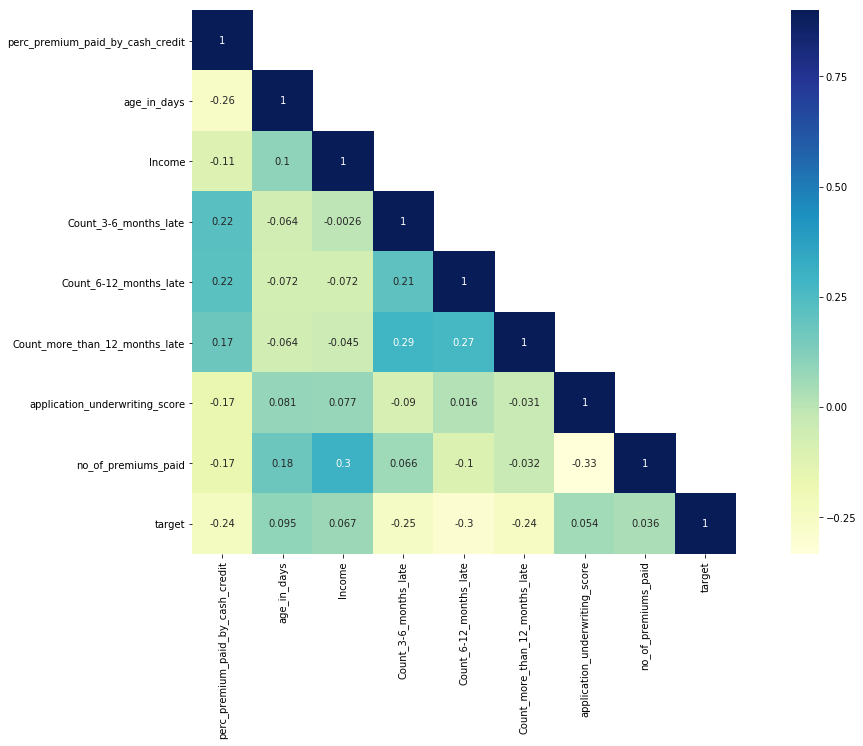

In [136]:
# looking at the correlation between numerical variables
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Some of the inferences from the above correlation map are:

1. premium_paid has r < 0.05 with target hence to be dropped

To answer the **hypothesis 3 : workingday** we perform the categorical-continuous bivariate 2-samp-ttest

In [137]:
train['residence_area_type'].value_counts()

Urban    42761
Rural    28136
Name: residence_area_type, dtype: int64

In [138]:
urban = train[train['residence_area_type'] == 'Urban']
rural = train[train['residence_area_type'] == 'Rural']

In [139]:
ttest_ind(urban['target'], rural['target'], nan_policy='omit')

Ttest_indResult(statistic=0.3662973572805271, pvalue=0.7141442944159786)

since p > 0.05 we infer demand(**target**) same for both rural and urban

### D. Variable Transformation

In [140]:
train.shape, test.shape

((70897, 11), (34224, 10))

In [141]:
# Dummification of categorical variables
categorical_cols = ['residence_area_type', 'sourcing_channel']
train = pd.get_dummies(train,columns = categorical_cols)
test = pd.get_dummies(test,columns = categorical_cols)

# add missing categorical columns with 0 as default value
for cols in train.columns:
    if cols not in test.columns:
        test[cols] = 0
# remove the target var from test set
test = test.drop('target', axis = 1)
# Check consistency of columns (test set should have one column(target variable) less)
train.shape, test.shape

((70897, 16), (34224, 15))

In [142]:
train.fillna(0, inplace = True)
test.fillna(0, inplace = True)
train.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
target                              0
residence_area_type_Rural           0
residence_area_type_Urban           0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
dtype: int64

#### Creating Test and Validation Set

In [143]:
training = train.sample(frac = 0.7)
validation = train.sample(frac = 0.3)

* We will drop the no_of_premiums_paid as it had weak corr

In [144]:
train = train.drop(['no_of_premiums_paid'],axis=1)
test = test.drop(['no_of_premiums_paid'], axis=1)
training = training.drop(['no_of_premiums_paid'],axis=1)
validation = validation.drop(['no_of_premiums_paid'],axis=1)

## Model Building
### Linear Regression Model 
*since our target variable* (**count**) *is continuous.*

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
# initialize the linear regression model
lModel = LinearRegression()

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [147]:
X_train = training.drop('target', 1)
y_train = training['target']
X_val = validation.drop('target', 1)
y_val = validation['target']

In [148]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((49628, 14), (49628,), (21269, 14), (21269,))

In [149]:
# fitting the model on X_train and y_train
lModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [150]:
# making prediction on validation set
prediction = lModel.predict(X_val)

In [151]:
from sklearn.metrics import roc_auc_score

In [152]:
roc_auc_score(y_val,prediction)

0.8350317370159823

In [153]:
# save the predictions from linear regression model and submit these predictions to generate score.
test_prediction = lModel.predict(test)

In [154]:
test_prediction

array([ 615.47322918, 3427.0207731 , 2235.43581252, ..., 2362.75746008,
       2549.75786096, 1072.48978273])

In [155]:
np.savetxt("my_linear_model.csv", test_prediction, delimiter=",")

We got a rmsle value of 0.8875 on the validation set.

Let's use Decision Tree now. Note that rmsle tells us how far the predictions are from the actual value, so we want rmsle value to be as close to 0 as possible. So, we will further try to reduce this value.

# Decision Tree

In [156]:
from sklearn.tree import DecisionTreeRegressor

In [157]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=5)

In [158]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [159]:
predict = dt_reg.predict(X_val)

In [160]:
# calculating rmsle of the predicted values
roc_auc_score(y_val, predict)

0.8156276724958164

In [161]:
test_prediction = dt_reg.predict(test)

In [162]:
final_prediction = np.exp(test_prediction)

In [163]:
submission = pd.DataFrame()

In [164]:
# creating a count column and saving the predictions in it
submission['target'] = final_prediction
df = pd.read_csv("test.csv")
submission['id'] = df['id']

In [165]:
submission.to_csv('submission.csv', header=True, index=False)